<a href="https://colab.research.google.com/github/NabilahSharfina/CELERATES-ACCELERATION-PROGRAM/blob/main/Final_Project_Credit_Risk_Week_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><center><bold>FINAL PROJECT</bold></center><h1>
<h1><center><bold>BIG DATA AND BUSINESS INTELLIGENCE</bold></center><h1>
<h1><center><bold>KAMPUS MERDEKA</bold></center><h1>
<h2><center><bold>CREDIT RISK ANALYSIS</bold></center><h2>

---



# **WEEK 2 - PREDICT DATA & MODELLING**

## Connect Google Drive

In [2]:
# Load data from google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Import Library

In [3]:
import math
from collections import Counter, defaultdict
from pprint import pprint

import pandas as pd # for handling and cleaning the dataset
import numpy as np # for performing mathematical calculations behind ML algorithms
import matplotlib.pyplot as plt # for visualization
import seaborn as sns # for visualization

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

from imblearn.over_sampling import SMOTE
from collections import Counter

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report

## 2.1 EDA

In [4]:
df = pd.read_csv('/content/drive/MyDrive/KAMPUS MERDEKA /Celerates Acceleration Program /FINAL PROJECT/Dataset/Demo/credit_risk.csv')
df

,Unnamed: 0,Id_customer,JenisKelamin,KepemilikanMobil,KepemilikanProperti,JmlAnak,Pendapatan,TipePendapatan,TingkatPendidikan,StatusKeluarga,...,FlagMobile,FlagWorkPhone,FlagPhone,Email,JmlAnggotaKeluarga,Usia,Pengalaman,Overdue,CreditStatus,KategoriUsia
0,0,5008808,Perempuan,Tidak,Ya,0,270000.0,Asosiasi komersial,Graduate,Belum Menikah,...,1,0,1,1,1,52,8,0,0,lansia
1,1,5008809,Perempuan,Tidak,Ya,0,270000.0,Asosiasi komersial,Graduate,Belum Menikah,...,1,0,1,1,1,52,8,-1,0,lansia
2,2,5008810,Perempuan,Tidak,Ya,0,270000.0,Asosiasi komersial,Graduate,Belum Menikah,...,1,0,1,1,1,52,8,0,0,lansia
3,3,5008811,Perempuan,Tidak,Ya,0,270000.0,Asosiasi komersial,Graduate,Belum Menikah,...,1,0,1,1,1,52,8,0,0,lansia
4,4,5008812,Perempuan,Tidak,Ya,0,283500.0,Pensioner,Post Graduate,Cerai,...,1,0,0,0,1,62,1001,0,0,lansia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36252,36252,5149158,Laki-laki,Ya,Ya,0,247500.0,Bekerja,Graduate,Menikah,...,1,1,0,0,2,30,10,2,1,dewasa
36253,36253,5149190,Laki-laki,Ya,Tidak,1,450000.0,Bekerja,Post Graduate,Menikah,...,1,0,1,1,3,27,1,5,1,dewasa
36254,36254,5149729,Laki-laki,Ya,Ya,0,90000.0,Bekerja,Graduate,Menikah,...,1,0,0,0,2,52,5,2,1,lansia
36255,36255,5149828,Laki-laki,Ya,Ya,0,315000.0,Bekerja,Graduate,Menikah,...,1,0,0,0,2,48,7,5,1,lansia


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36257 entries, 0 to 36256
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           36257 non-null  int64  
 1   Id_customer          36257 non-null  int64  
 2   JenisKelamin         36257 non-null  object 
 3   KepemilikanMobil     36257 non-null  object 
 4   KepemilikanProperti  36257 non-null  object 
 5   JmlAnak              36257 non-null  int64  
 6   Pendapatan           36257 non-null  float64
 7   TipePendapatan       36257 non-null  object 
 8   TingkatPendidikan    36257 non-null  object 
 9   StatusKeluarga       36257 non-null  object 
 10  TipeRumah            36257 non-null  object 
 11  FlagMobile           36257 non-null  int64  
 12  FlagWorkPhone        36257 non-null  int64  
 13  FlagPhone            36257 non-null  int64  
 14  Email                36257 non-null  int64  
 15  JmlAnggotaKeluarga   36257 non-null 

### 2.1.1 Missing Value

In [5]:
# Melihat apakah ada missing value dari dataset
df.isna().sum()

Unnamed: 0             0
Id_customer            0
JenisKelamin           0
KepemilikanMobil       0
KepemilikanProperti    0
JmlAnak                0
Pendapatan             0
TipePendapatan         0
TingkatPendidikan      0
StatusKeluarga         0
TipeRumah              0
FlagMobile             0
FlagWorkPhone          0
FlagPhone              0
Email                  0
JmlAnggotaKeluarga     0
Usia                   0
Pengalaman             0
Overdue                0
CreditStatus           0
KategoriUsia           0
dtype: int64

### 2.1.2 Unique Value

In [6]:
# Melihat data unique dari setiap fitur dalam tabel
for feature in df.columns:
    print(
        f"- Jumlah unique value pada kolom `{feature}`:",
        df[feature].nunique()
    )

- Jumlah unique value pada kolom `Unnamed: 0`: 36257
- Jumlah unique value pada kolom `Id_customer`: 36257
- Jumlah unique value pada kolom `JenisKelamin`: 2
- Jumlah unique value pada kolom `KepemilikanMobil`: 2
- Jumlah unique value pada kolom `KepemilikanProperti`: 2
- Jumlah unique value pada kolom `JmlAnak`: 9
- Jumlah unique value pada kolom `Pendapatan`: 265
- Jumlah unique value pada kolom `TipePendapatan`: 5
- Jumlah unique value pada kolom `TingkatPendidikan`: 3
- Jumlah unique value pada kolom `StatusKeluarga`: 3
- Jumlah unique value pada kolom `TipeRumah`: 5
- Jumlah unique value pada kolom `FlagMobile`: 1
- Jumlah unique value pada kolom `FlagWorkPhone`: 2
- Jumlah unique value pada kolom `FlagPhone`: 2
- Jumlah unique value pada kolom `Email`: 2
- Jumlah unique value pada kolom `JmlAnggotaKeluarga`: 10
- Jumlah unique value pada kolom `Usia`: 49
- Jumlah unique value pada kolom `Pengalaman`: 45
- Jumlah unique value pada kolom `Overdue`: 7
- Jumlah unique value pada kolo

### 2.1.3 Duplicate Data

In [7]:
# Mengecek baris yang duplikat
df[df['Id_customer'].duplicated()]

,Unnamed: 0,Id_customer,JenisKelamin,KepemilikanMobil,KepemilikanProperti,JmlAnak,Pendapatan,TipePendapatan,TingkatPendidikan,StatusKeluarga,...,FlagMobile,FlagWorkPhone,FlagPhone,Email,JmlAnggotaKeluarga,Usia,Pengalaman,Overdue,CreditStatus,KategoriUsia


### 2.1.4 Data Cleaning

In [5]:
# Menghapus kolom yang tidak digunakan
df = df.drop(columns=['Unnamed: 0', 'Id_customer', 'FlagMobile', 'FlagWorkPhone', 'Email', 'Usia', 'Overdue'])
df

,JenisKelamin,KepemilikanMobil,KepemilikanProperti,JmlAnak,Pendapatan,TipePendapatan,TingkatPendidikan,StatusKeluarga,TipeRumah,FlagPhone,JmlAnggotaKeluarga,Pengalaman,CreditStatus,KategoriUsia
0,Perempuan,Tidak,Ya,0,270000.0,Asosiasi komersial,Graduate,Belum Menikah,Rumah Pribadi,1,1,8,0,lansia
1,Perempuan,Tidak,Ya,0,270000.0,Asosiasi komersial,Graduate,Belum Menikah,Rumah Pribadi,1,1,8,0,lansia
2,Perempuan,Tidak,Ya,0,270000.0,Asosiasi komersial,Graduate,Belum Menikah,Rumah Pribadi,1,1,8,0,lansia
3,Perempuan,Tidak,Ya,0,270000.0,Asosiasi komersial,Graduate,Belum Menikah,Rumah Pribadi,1,1,8,0,lansia
4,Perempuan,Tidak,Ya,0,283500.0,Pensioner,Post Graduate,Cerai,Rumah Pribadi,0,1,1001,0,lansia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36252,Laki-laki,Ya,Ya,0,247500.0,Bekerja,Graduate,Menikah,Rumah Pribadi,0,2,10,1,dewasa
36253,Laki-laki,Ya,Tidak,1,450000.0,Bekerja,Post Graduate,Menikah,Rumah Pribadi,1,3,1,1,dewasa
36254,Laki-laki,Ya,Ya,0,90000.0,Bekerja,Graduate,Menikah,Rumah Pribadi,0,2,5,1,lansia
36255,Laki-laki,Ya,Ya,0,315000.0,Bekerja,Graduate,Menikah,Rumah Pribadi,0,2,7,1,lansia


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36257 entries, 0 to 36256
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   JenisKelamin         36257 non-null  object 
 1   KepemilikanMobil     36257 non-null  object 
 2   KepemilikanProperti  36257 non-null  object 
 3   JmlAnak              36257 non-null  int64  
 4   Pendapatan           36257 non-null  float64
 5   TipePendapatan       36257 non-null  object 
 6   TingkatPendidikan    36257 non-null  object 
 7   StatusKeluarga       36257 non-null  object 
 8   TipeRumah            36257 non-null  object 
 9   FlagPhone            36257 non-null  int64  
 10  JmlAnggotaKeluarga   36257 non-null  int64  
 11  Pengalaman           36257 non-null  int64  
 12  CreditStatus         36257 non-null  int64  
 13  KategoriUsia         36257 non-null  object 
dtypes: float64(1), int64(5), object(8)
memory usage: 3.9+ MB


### 2.1.5 Feature Category

In [6]:
# Mengetahui kolom apa saja yang termasuk fitur (variabel) numerik/kategoris
numerical_features = df.select_dtypes(include="number").columns.tolist()
categorical_features = df.select_dtypes(include="object").columns.tolist()

print("Numerical features:")
pprint(numerical_features)
print("\nCategorical features:")
pprint(categorical_features, compact=True)

Numerical features:
['JmlAnak',
 'Pendapatan',
 'FlagPhone',
 'JmlAnggotaKeluarga',
 'Pengalaman',
 'CreditStatus']

Categorical features:
['JenisKelamin', 'KepemilikanMobil', 'KepemilikanProperti', 'TipePendapatan',
 'TingkatPendidikan', 'StatusKeluarga', 'TipeRumah', 'KategoriUsia']


### 2.1.6 Statistic Summary

In [11]:
# Memahami karakteristik data melalui fitur-fitur numerik dengan function describe(). T=Transpose
df[numerical_features].describe().T

,count,mean,std,min,25%,50%,75%,max
JmlAnak,36257.0,0.430427,0.742474,0.0,0.0,0.0,1.0,19.0
Pendapatan,36257.0,186625.534421,101548.649430,27000.0,121500.0,157500.0,225000.0,1575000.0
FlagPhone,36257.0,0.294812,0.455965,0.0,0.0,0.0,1.0,1.0
JmlAnggotaKeluarga,36257.0,2.198720,0.911781,1.0,2.0,2.0,3.0,20.0
Pengalaman,36257.0,174.416058,371.770973,0.0,3.0,7.0,16.0,1001.0
CreditStatus,36257.0,0.116226,0.320500,0.0,0.0,0.0,0.0,1.0


In [12]:
# Memahami karakteristik data melalui fitur-fitur kategoris dengan function describe()
df[categorical_features].describe().T

,count,unique,top,freq
JenisKelamin,36257,2,Perempuan,24279
KepemilikanMobil,36257,2,Tidak,22476
KepemilikanProperti,36257,2,Ya,24367
TipePendapatan,36257,5,Bekerja,18708
TingkatPendidikan,36257,3,Graduate,26046
StatusKeluarga,36257,3,Menikah,27845
TipeRumah,36257,5,Rumah Pribadi,32367
KategoriUsia,36257,4,dewasa,19853


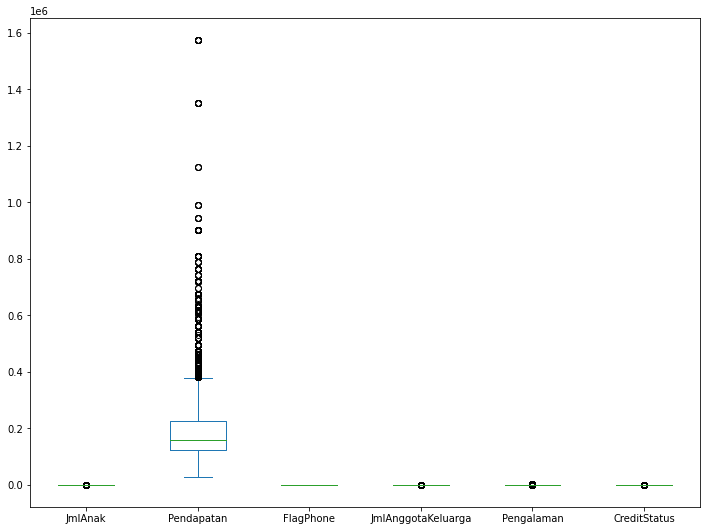

In [13]:
# Visualisasikan fitur-fitur numerik ke Boxplot untuk melihat bagaimana data tersebar
df[numerical_features].plot(kind="box", figsize=(12, 9))
plt.grid(False)
plt.show()

### 2.1.7 Data Correlation

In [14]:
# Melihat hubungan dari fitur numerik menggunakan correlation 
df.corr()

,JmlAnak,Pendapatan,FlagPhone,JmlAnggotaKeluarga,Pengalaman,CreditStatus
JmlAnak,1.000000,0.033966,-0.016770,0.889197,-0.231313,0.011496
Pendapatan,0.033966,1.000000,0.018073,0.024134,-0.169050,0.023706
FlagPhone,-0.016770,0.018073,1.000000,-0.004652,-0.005600,-0.006858
JmlAnggotaKeluarga,0.889197,0.024134,-0.004652,1.000000,-0.223191,0.009117
Pengalaman,-0.231313,-0.169050,-0.005600,-0.223191,1.000000,-0.022593
CreditStatus,0.011496,0.023706,-0.006858,0.009117,-0.022593,1.000000


> Untuk lebih jelas dalam mengetahui pasangan fitur mana yang memiliki koefisien korelasi yang kuat (mendekati 1 atau mendekati -1), kita bisa buat plot heatmap berikut.

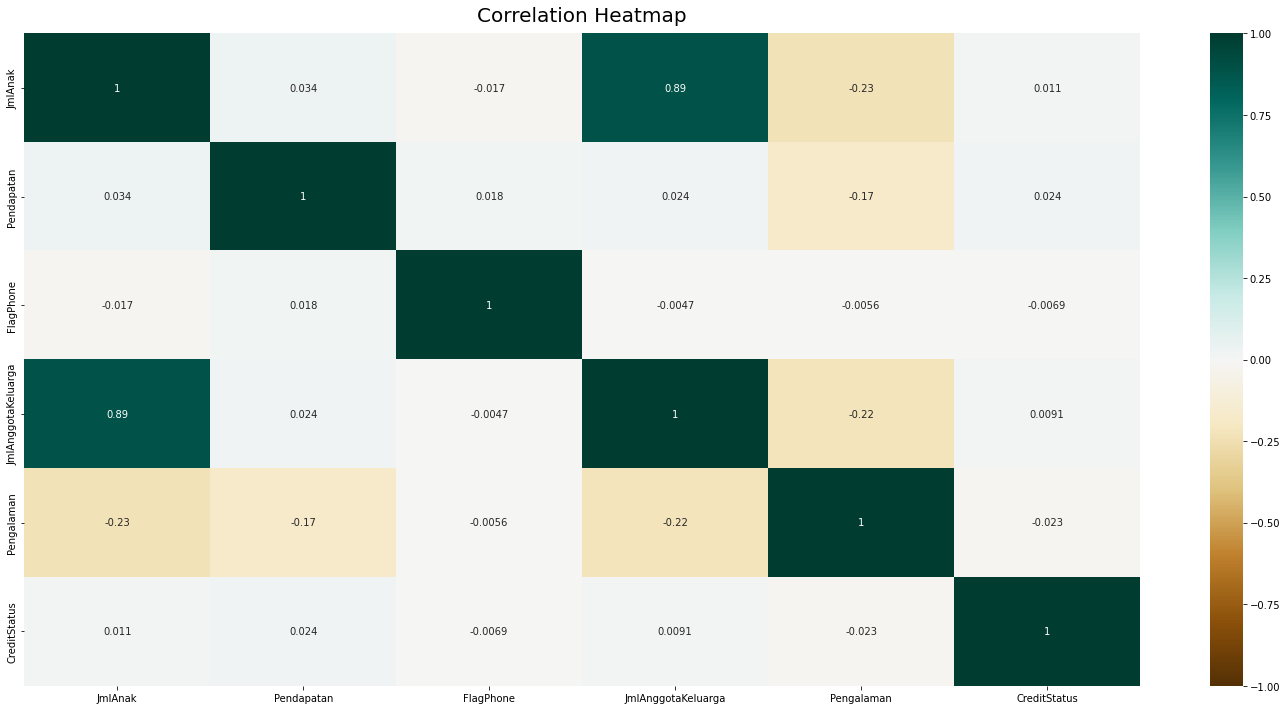

In [15]:
plt.figure(figsize=(25, 12))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':20}, pad=12);

### 2.1.8 Handling Outlier

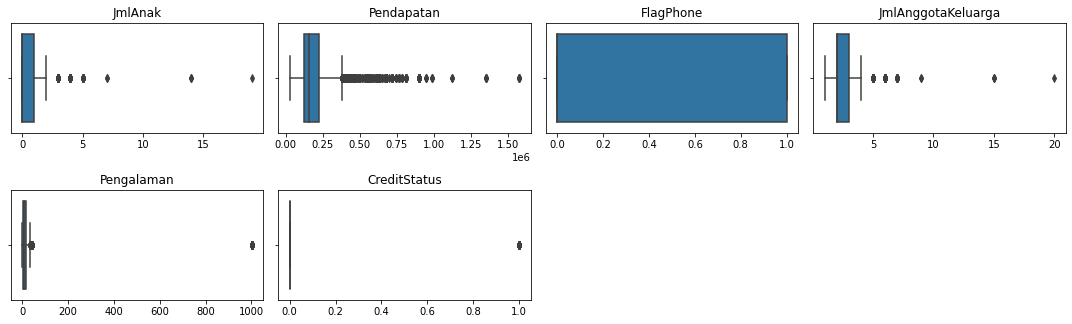

In [7]:
# Numerical Features
num_feature = [fea for fea in df.describe().columns]
num_feature

plt.figure(figsize=(15, 9), facecolor='white')
plotnumber = 1
    
for feature in num_feature:
    ax = plt.subplot(4,4, plotnumber)
    sns.boxplot(x=feature, data=df);
    plt.title(feature, fontsize=12)
    plt.xlabel(None)
    plt.tight_layout()
    plotnumber += 1

> Ada beberapa cara untuk menghilangkan outliers.
* Mengganti nilai outliers menggunakan nilai lower bound dan upper bound.
* Capping menggunakan nilai median
* Capping menggunakan nilai mean
* Capping menggunakan nilai modus

> **Referensi:** [handling outlier](https://blog.sanbercode.com/docs/materi-eda/data-type-missing-value-outlier/)

In [8]:
# Membuat function IQR Detection
def outlier(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    limit = iqr * 1.5
    print(f'IQR: {iqr}')
    upperlimit = q3 + limit
    lowerlimit = q1 - limit
    print(f'Upper Limit: {upperlimit}')
    print(f'Lower Limit: {lowerlimit}')

# Buang Outlier
outlier_fea_1 = ['JmlAnak', 
                 'Pendapatan', 
                 'JmlAnggotaKeluarga', 
                 'Pengalaman'
                 ]

for i in outlier_fea_1:
    print(i)
    outlier(df[i])
    print()

df = df[(df['JmlAnak'] < 2.5) & 
        (df['Pendapatan'] < 380250.0) & 
        (df['JmlAnggotaKeluarga'] < 4.5) & 
        (df['Pengalaman'] < 35.5)
        ]

JmlAnak
IQR: 1.0
Upper Limit: 2.5
Lower Limit: -1.5

Pendapatan
IQR: 103500.0
Upper Limit: 380250.0
Lower Limit: -33750.0

JmlAnggotaKeluarga
IQR: 1.0
Upper Limit: 4.5
Lower Limit: 0.5

Pengalaman
IQR: 13.0
Upper Limit: 35.5
Lower Limit: -16.5



In [9]:
# Clean dataframe from outlier
credit_risk_df = df.drop_duplicates()
credit_risk_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8396 entries, 0 to 36256
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   JenisKelamin         8396 non-null   object 
 1   KepemilikanMobil     8396 non-null   object 
 2   KepemilikanProperti  8396 non-null   object 
 3   JmlAnak              8396 non-null   int64  
 4   Pendapatan           8396 non-null   float64
 5   TipePendapatan       8396 non-null   object 
 6   TingkatPendidikan    8396 non-null   object 
 7   StatusKeluarga       8396 non-null   object 
 8   TipeRumah            8396 non-null   object 
 9   FlagPhone            8396 non-null   int64  
 10  JmlAnggotaKeluarga   8396 non-null   int64  
 11  Pengalaman           8396 non-null   int64  
 12  CreditStatus         8396 non-null   int64  
 13  KategoriUsia         8396 non-null   object 
dtypes: float64(1), int64(5), object(8)
memory usage: 983.9+ KB


In [20]:
credit_risk_df.value_counts('CreditStatus')

CreditStatus
0    6550
1    1846
dtype: int64

### 2.1.9 Visualization

In [22]:
# Visualisasi kolom status untuk melihat jumlah data
def plot_count(data, x=None, y=None, palette=None, figsize=(12, 3), **kwargs):
    column_order = data[x or y].value_counts().index

    plt.figure(figsize=figsize)
    sns.countplot(
        x=x, y=y, data=data, order=column_order,
        palette=palette, **kwargs
    )
    plt.grid(False)

MAIN_COLOR = ["#29B5BF"] 
OTHER_COLOR = ["#777777"]

#### 2.9.1 Jenis Kelamin

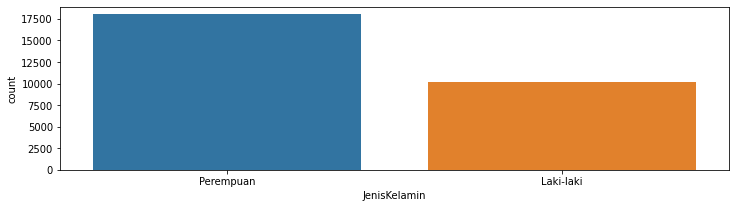

In [23]:
# Show visualization 'JenisKelamin'
plot_count(x="JenisKelamin", data=df)

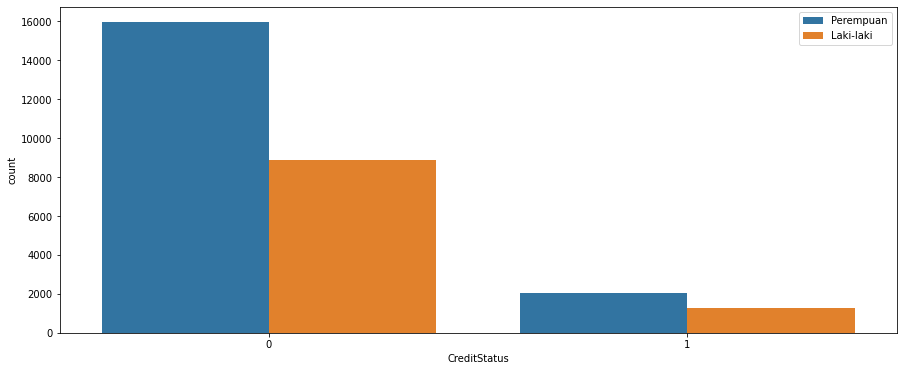

In [24]:
# Show visualization 'CreditStatus' terhadap 'JenisKelamin'
plot_count(x="CreditStatus", hue="JenisKelamin", data=df, figsize=(15, 6))
plt.legend(loc="upper right")
plt.show()

#### 2.9.2 Kepemilikan

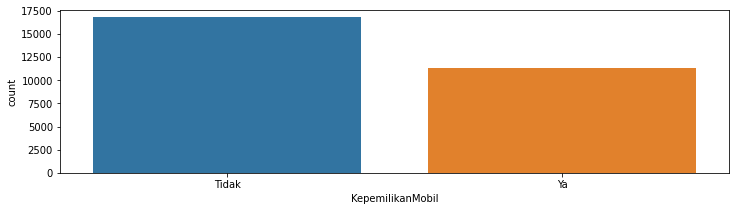

In [25]:
# Show visualization 'KepemilikanMobil'
plot_count(x="KepemilikanMobil", data=df)

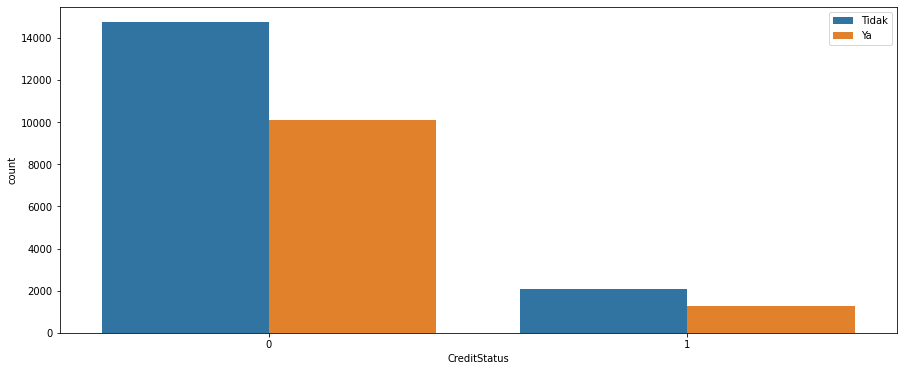

In [26]:
# Show visualization 'CreditStatus' terhadap 'KepemilikanMobil'
plot_count(x="CreditStatus", hue="KepemilikanMobil", data=df, figsize=(15, 6))
plt.legend(loc="upper right")
plt.show()

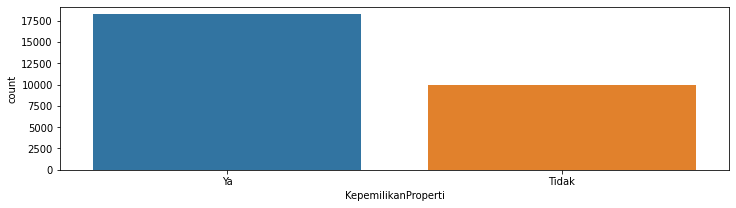

In [27]:
# Show visualization 'KepemilikanProperti'
plot_count(x="KepemilikanProperti", data=df)

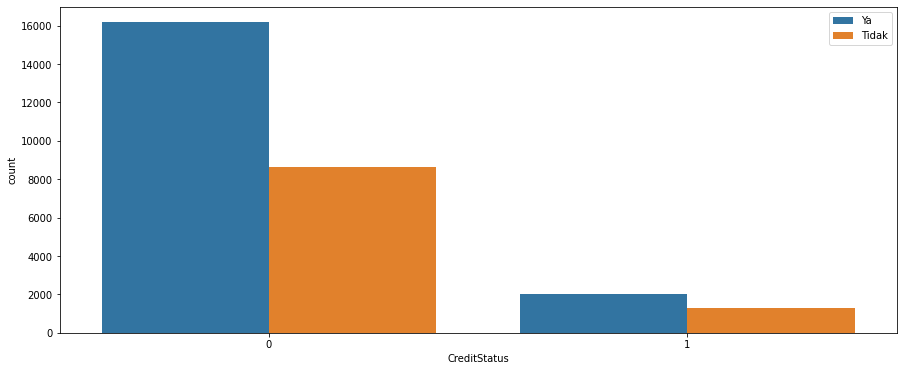

In [28]:
# Show visualization 'CreditStatus' terhadap 'KepemilikanProperti'
plot_count(x="CreditStatus", hue="KepemilikanProperti", data=df, figsize=(15, 6))
plt.legend(loc="upper right")
plt.show()

#### 2.9.3 Credit Status

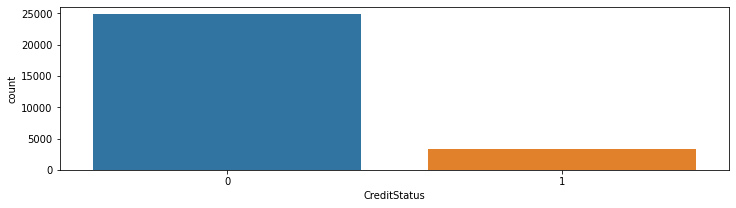

In [29]:
# Show visualization 'CreditStatus'
plot_count(x="CreditStatus", data=df)

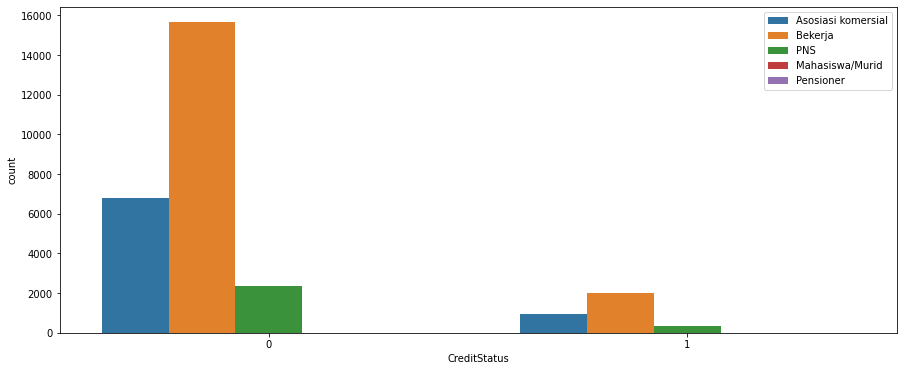

In [30]:
# Show visualization 'CreditStatus' terhadap 'TipePendapatan'
plot_count(x="CreditStatus", hue="TipePendapatan", data=df, figsize=(15, 6))
plt.legend(loc="upper right")
plt.show()

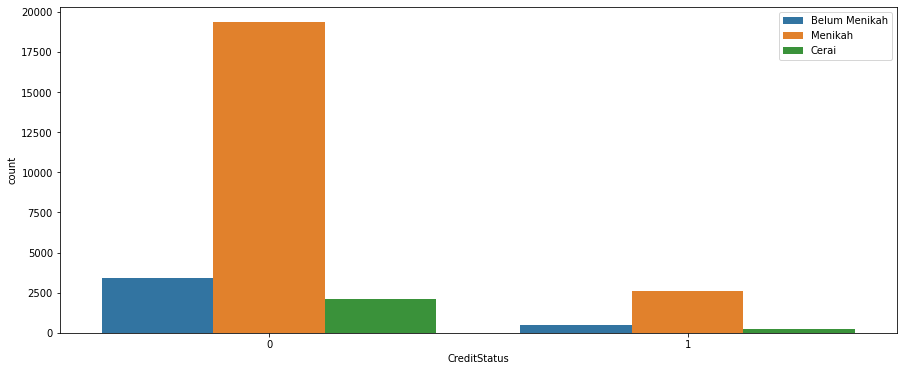

In [31]:
# Show visualization 'CreditStatus' terhadap 'StatusKeluarga'
plot_count(x="CreditStatus", hue="StatusKeluarga", data=df, figsize=(15, 6))
plt.legend(loc="upper right")
plt.show()

#### 2.9.4 Kategori Usia

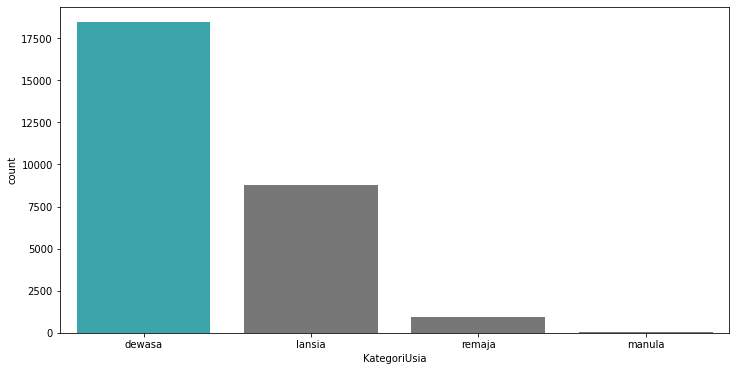

In [32]:
age_category = df.KategoriUsia.value_counts().index

plt.figure(figsize=(12, 6))
sns.countplot(
    x="KategoriUsia",
    data=df,
    order=age_category,
    palette=["#29B5BF"] + (len(age_category)-1)*["#777777"]
)
plt.grid(False)

plt.show()

> **Insights:** 

> * Dari visualisasi di atas, terlihat bahwa mayoritas adalah kategori **Dewasa**.
> * Lalu, bagaimana distribusi kategori umur pada masing-masing responden yang memiliki sakit jantung maupun tidak? Mari kita buat visualisasinya.

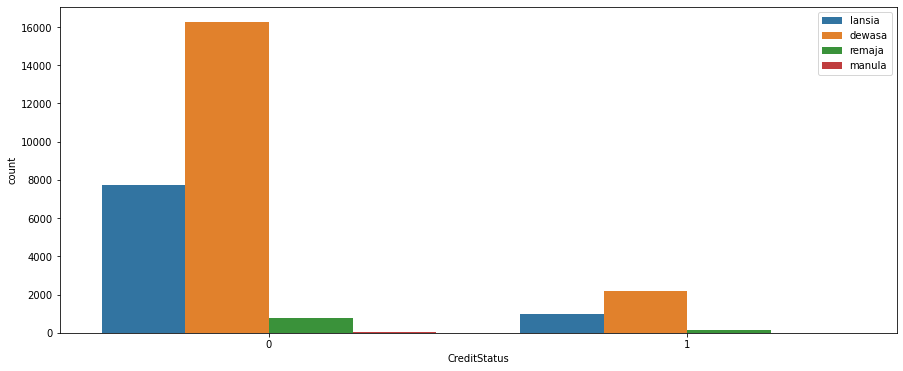

In [33]:
# Show visualization 'CreditStatus' terhadap 'KategoriUsia'
plot_count(x="CreditStatus", hue="KategoriUsia", data=df, figsize=(15, 6))
plt.legend(loc="upper right")
plt.show()

## 2.2 Modelling

In [10]:
credit_risk_df.head()

,JenisKelamin,KepemilikanMobil,KepemilikanProperti,JmlAnak,Pendapatan,TipePendapatan,TingkatPendidikan,StatusKeluarga,TipeRumah,FlagPhone,JmlAnggotaKeluarga,Pengalaman,CreditStatus,KategoriUsia
0,Perempuan,Tidak,Ya,0,270000.0,Asosiasi komersial,Graduate,Belum Menikah,Rumah Pribadi,1,1,8,0,lansia
7,Perempuan,Ya,Tidak,0,130500.0,Bekerja,Graduate,Menikah,Rumah Pribadi,0,2,3,1,dewasa
9,Perempuan,Tidak,Ya,0,157500.0,Bekerja,Graduate,Menikah,Rumah Pribadi,1,2,4,1,dewasa
12,Perempuan,Tidak,Ya,1,112500.0,Bekerja,Graduate,Belum Menikah,Rumah Pribadi,0,2,4,0,dewasa
14,Perempuan,Ya,Ya,2,135000.0,Bekerja,Graduate,Menikah,Rumah Pribadi,0,4,9,0,dewasa


> **Note:** Jenis-Jenis Tipe Data
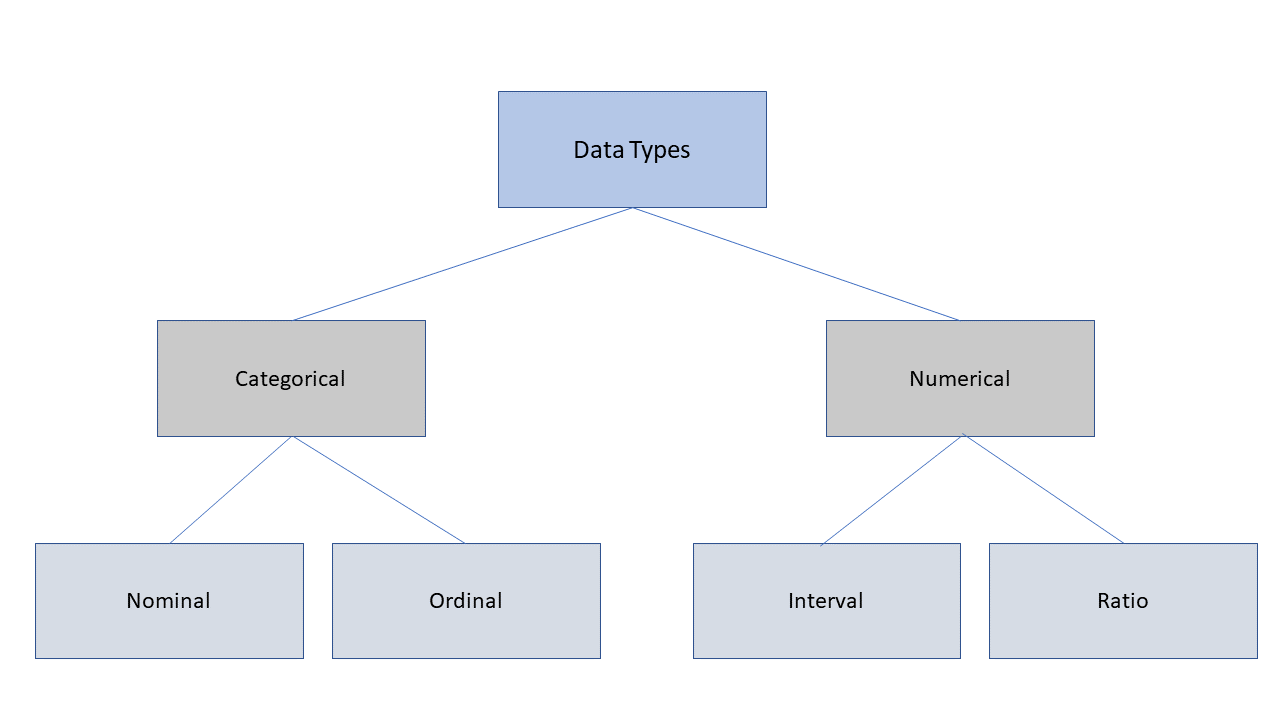

In [11]:
# Mengetahui kolom yang termasuk fitur numerical dan categorical
numerical_features = credit_risk_df.select_dtypes(include="number").columns.tolist()
categorical_features = credit_risk_df.select_dtypes(include="object").columns.tolist()

print("Numerical features:")
pprint(numerical_features)
print("\nCategorical features:")
pprint(categorical_features, compact=True)

Numerical features:
['JmlAnak',
 'Pendapatan',
 'FlagPhone',
 'JmlAnggotaKeluarga',
 'Pengalaman',
 'CreditStatus']

Categorical features:
['JenisKelamin', 'KepemilikanMobil', 'KepemilikanProperti', 'TipePendapatan',
 'TingkatPendidikan', 'StatusKeluarga', 'TipeRumah', 'KategoriUsia']


#### Rows dan unique value

In [19]:
# Melihat isi data dari setiap kolom
for feature in df.columns:
    print(
        f"- Rows value pada kolom `{feature}`:",
        credit_risk_df[feature].unique()
    )

- Rows value pada kolom `JenisKelamin`: ['Perempuan' 'Laki-laki']
- Rows value pada kolom `KepemilikanMobil`: ['Tidak' 'Ya']
- Rows value pada kolom `KepemilikanProperti`: ['Ya' 'Tidak']
- Rows value pada kolom `JmlAnak`: [0 1 2]
- Rows value pada kolom `Pendapatan`: [270000.  130500.  157500.  112500.  135000.  211500.  126000.  247500.
 297000.  216000.  225000.  315000.  148500.  202500.  180000.  292500.
  74250.  144000.  193500.  139500.   76500.   67500.   90000.   81000.
 198000.   45000.  238500.   99000.  360000.  279000.  306000.  189000.
 328500.  310500.  171000.  121500.   72000.  184500.   94500.  256500.
 166500.  196650.   40500.  243000.  162000.  103500.  257625.   58500.
 207000.   54000.  234000.  117000.  261000.  175500.  337500.  119250.
  63000.  274500.   85500.  108000.  145350.  173250.   36000.  118350.
 153000.  123750.  252000.  220500.  133650.  265500.  227250.   51750.
  69750.  288000.  234135.   74061.  175950.  364500.  240750.  333000.
 342000.  11

### 2.2.1 Encoding

#### 2.2.1.1 Label Encoding

In [50]:
# Label Encoding: digunakan untuk tipe data ordinal

from sklearn.preprocessing import LabelEncoder

# Creating initial
cols = [
        'TipePendapatan',
        'TingkatPendidikan',  
        'StatusKeluarga',
        'TipeRumah',
        'KategoriUsia'
        ]

# Creating instance of labelencoder
labelencoder = LabelEncoder()

# Assigning numerical values and storing in another column
for col in cols:
    credit_risk_df[col] = labelencoder.fit_transform(credit_risk_df[col])

<ipython-input-50-375d00a2854a>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_drop_duplicate[col] = le.fit_transform(df_drop_duplicate[col])


In [51]:
credit_risk_df.head()

,JenisKelamin,KepemilikanMobil,KepemilikanProperti,JmlAnak,Pendapatan,TipePendapatan,TingkatPendidikan,StatusKeluarga,TipeRumah,FlagPhone,JmlAnggotaKeluarga,Pengalaman,CreditStatus,KategoriUsia
0,1,0,1,0,270000.0,0,0,0,3,1,1,8,0,1
7,1,1,0,0,130500.0,1,0,2,3,0,2,3,1,0
9,1,0,1,0,157500.0,1,0,2,3,1,2,4,1,0
12,1,0,1,1,112500.0,1,0,0,3,0,2,4,0,0
14,1,1,1,2,135000.0,1,0,2,3,0,4,9,0,0


#### 2.2.1.2 One Hot Encoding

In [ ]:
# One Hot Encoding: digunakan untuk bukan tipe data ordinal, misal nominal, interval, dan ratio


### 2.2.2 Data Splitting

> Pada tahap ini, kita akan membagi dataset menjadi 3 set yaitu: 
> * **training**, dan
> * **testing** 

> Dengan proporsi **80% : 20%**

In [52]:
# Specify input and output attributes
X = df_drop_duplicate.drop(columns=['CreditStatus'], axis=1)
y = df_drop_duplicate['CreditStatus']

In [53]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [54]:
# Handle imbalance dataset
sm = SMOTE(sampling_strategy='auto')
x_r, y_r= sm.fit_resample(x_train, y_train)

print('Original dataset shape is ', Counter(y_train))
print('Resample dataset shape is ', Counter(y_r))

Original dataset shape is  Counter({0: 4939, 1: 1358})
Resample dataset shape is  Counter({0: 4939, 1: 4939})


In [55]:
# Membuat model machine learning
pipeline = []
pipeline.append(SVC())
pipeline.append(KNeighborsClassifier())
pipeline.append(DecisionTreeClassifier())

In [56]:
# Memasukkan model machine learning yang telah dibuat kedalam sebuah list
model_list = ['SVM', 'KNN', 'Decision']
acc_list = []
auc_list = []
cm_list = []
report = []

In [57]:
for model in pipeline:
  model.fit(x_r, y_r)
  y_pred = model.predict(x_test)
  acc_list.append(metrics.accuracy_score(y_test, y_pred))
  fpr, tpr, _thresholds = metrics.roc_curve(y_test, y_pred)
  auc_list.append(round(metrics.auc(fpr,tpr), 2))
  cm_list.append(confusion_matrix(y_test, y_pred))

In [58]:
# Membuat dataframe terkait informasi model
result = pd.DataFrame({'Model' :model_list,
                       'Accuracy' : acc_list,
                       'AUC' : auc_list})
result

,Model,Accuracy,AUC
0,SVM,0.476894,0.50
1,KNN,0.540734,0.42
2,Decision,0.501191,0.37


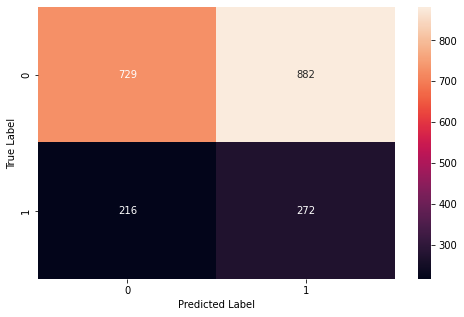

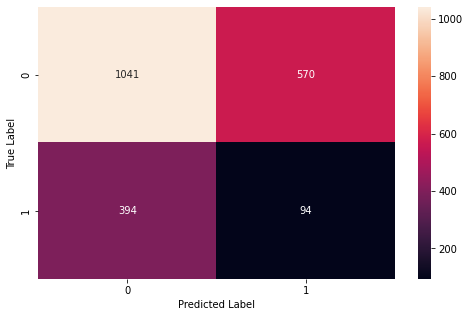

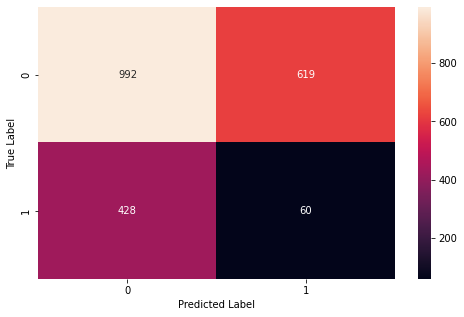

In [59]:
# Visualisasi hasil klasifikasi
for model in cm_list:
  f, ax = plt.subplots(figsize=(8,5))
  sns.heatmap(model, annot=True, fmt=".0f", ax=ax)
  plt.xlabel("Predicted Label")
  plt.ylabel("True Label")
  plt.show()

### 2.2.3 Model Training

In [ ]:
from sklearn.model_selection import cross_val_score

def classify(model, x, y):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    model.fit(x_train, y_train)
    print("Accuracy is", model.score(x_test, y_test)*100)
    # cross validation - it is used for better validation of model
    # eg: cv-5, train-4, test-1
    score = cross_val_score(model, x, y, cv=5)
    print("Cross validation is",np.mean(score)*100)

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
classify(model, X, y)

Accuracy is 88.69639307015052
Cross validation is 88.14967405485741


In [ ]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
classify(model, X, y)

Accuracy is 88.38398182334564
Cross validation is 73.89945564580546


In [ ]:
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier

model = RandomForestClassifier()
classify(model, X, y)

Accuracy is 88.75319511502414
Cross validation is 83.36054316565102


### 2.2.4 Hyperparameter Tuning

In [ ]:
model = RandomForestClassifier(n_estimators=100, min_samples_split=25, max_depth=7, max_features=1)
classify(model, X, y)

Accuracy is 88.69639307015052
Cross validation is 88.14967405485741


### 2.2.5 Confusion Matrix

In [ ]:
model = RandomForestClassifier()
model.fit(x_train, y_train)

RandomForestClassifier()

In [ ]:
from sklearn.metrics import confusion_matrix

y_pred = model.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[6022,  224],
       [ 559,  237]])

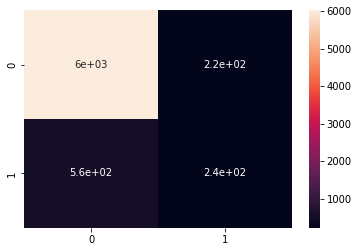

In [ ]:
sns.heatmap(cm, annot=True)